In [2]:
#!/usr/bin/env python

import numpy as np
import os
from shapely import geometry
import tkinter
import matplotlib.pyplot as plt
from netCDF4 import Dataset

from gnssr.tds.tds_data import *
from gnssr.utils import *
from gnssr.targets import *



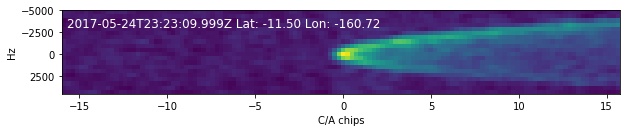

5.403472900390625
power: 1.3734429440937077e-17
1.3734429440937077e-17


In [86]:
# Di Simone
'''
file_root_name = 'raw/L1B/2017-05-31-H18'
target = targets['hibernia']
group = '000095'
index = 100
'''

file_root_name = '2017-05-25-H00'
target = targets['hibernia']
group = '000082'
index = 201

tds = tds_data(file_root_name, group, index)
tds.plot_ddm()

print(tds.l2b.variables['WindSpeed'][tds.index_l2b].data)
print(tds.peak_power())

In [4]:
print(tds.rootgrp.groups[tds.group].variables['IntegrationMidPointTime'][tds.index].data)
print(tds.metagrp.groups[tds.group].variables['IntegrationMidPointTime'][tds.index].data)

736846.7634490625
736846.7634490625


In [5]:
code_delay_spacing_samples_between_pixels = tds.metagrp.groups[tds.group]
print(code_delay_spacing_samples_between_pixels)

<class 'netCDF4._netCDF4.Group'>
group /000095:
    TrackID: 95
    DataTag: 18
    PtrId: 1812
    ReflectionChannelNumber: 2
    MasterChannelNumber: 8
    PRN: 21
    SVN: 45
    GnssBlock: 5
    GnssBlock_units: SSTL.ZTCDataMergeTools.TransmitterCorrections+GPSBlockEnum>0:Unknown,1:BlockI,2:BlockII,3:BlockIIA,4:BlockIIR,5:BlockIIR_A,6:BlockIIR_B,7:BlockIIR_M,8:BlockIIF
    FrontEnd: 1
    FrontEnd_units: SSTL.ZTCDataMergeTools.TrackMetaDataHeader+FrontEndEnum>0:ZenithL1_DF,1:NadirL1,2:ZenithL1_CLAP,3:ZenithL1_CAP,4:Unknown5,5:Unknown6,6:ZenithL2_DF,7:NadirL2,8:Unknown
    SignalType: 1
    SignalType_units: SSTL.ZTCDataMergeTools.TrackMetaDataHeader+SignalTypeEnum>0:NO_SIGNAL,1:GPS_L1
    SamplingFrequency: 16367000.0
    AllocationMode: 1
    AllocationMode_units: SSTL.ZTCDataMergeTools.TrackMetaDataHeader+AllocationModeEnum>0:Manual,1:Auto,2:Unknown
    TrackingMode: 2
    TrackingMode_units: SSTL.ZTCStreamProcessing.DDMTrackHeader+TrackingModeEnum>0:Idle,1:DirectSignalOverride,2

In [23]:
'''

    ddmPeak = metadata.trackVars(:, metadata.trackVarNames.DDMOutputNumericalScaling);
    noiseEstimate = metadata.trackVars(:, metadata.trackVarNames.MeanNoiseBox);
    systemGainBB_dB = metadata.trackVars(:, metadata.trackVarNames.SystemGainBB) + metadata.trackVars(:, metadata.trackVarNames.SystemGainBBComp);
    systemGainExtRef_dB = metadata.trackVars(:, metadata.trackVarNames.SystemGainExtRef) + metadata.trackVars(:, metadata.trackVarNames.SystemGainExtRefComp);
    systemGainLin = zeros(size(systemGainBB_dB));
    for idx = 1:metadata.trackLength
        if metadata.trackVars(idx, metadata.trackVarNames.ReferenceType) == 1 %Blackbody
            systemGainLin(idx) = 10.^(systemGainBB_dB(idx) / 10);
        elseif metadata.trackVars(idx, metadata.trackVarNames.ReferenceType) == 2 %ExtRef
            systemGainLin(idx) = 10.^(systemGainExtRef_dB(idx) / 10);
        elseif metadata.trackVars(:, metadata.trackVarNames.ReferenceType) == 3 %Both available
            systemGainLin(idx) = 10.^(systemGainBB_dB(idx) / 10);
        else
            systemGainLin(idx) = nan;
        end
    end
    inputCableGainLin = 10.^(-0.6/10);

    peakReceivedPowerLin = calcReceivedPowerSMN(ddmPeak, noiseEstimate, systemGainLin, inputCableGainLin);
    peakReceivedPower_dB = 10*log10(peakReceivedPowerLin); %dBW




    receivedPower = (ddmPixel - noiseEstimate) ...
                        ./ systemGain ...
                        ./ inputCableGainLin;
'''
'''
file_root_name = 'raw/L1B/2017-05-31-H18'
target = targets['hibernia']
group = '000095'
index = 100
'''

file_root_name = 'raw/L1B/2017-11-11-H18'
target = targets['hibernia']
group = '000015'
index = 350

tds = tds_data(file_root_name, group, index)
tds.find_index_meta()
    
#print(tds.metagrp.groups[tds.group].variables['IntegrationMidPointTime'][tds.index].data)
ddmPeak = tds.metagrp.groups[tds.group].variables['DDMOutputNumericalScaling'][tds.index].data
noiseEstimate = tds.metagrp.groups[tds.group].variables['MeanNoiseBox'][tds.index].data

systemGainBB_dB = tds.metagrp.variables['SystemGainBB'][tds.index_meta].data + tds.metagrp.variables['SystemGainBBComp'][tds.index_meta].data
systemGainExtRef_dB = tds.metagrp.variables['SystemGainExtRef'][tds.index_meta].data + tds.metagrp.variables['SystemGainExtRefComp'][tds.index_meta].data

referenceType = tds.metagrp.variables['ReferenceType'][tds.index_meta].data
systemGainLin = 0
if (referenceType == 1) :
    systemGainLin = 10**(systemGainBB_dB/10)
elif (referenceType == 2) :
    systemGainLin = 10**(systemGainExtRef_dB/10)
elif (referenceType == 3) :
    systemGainLin = 10**(systemGainBB_dB/10)
else :
    print('No power data available')

inputCableGainLin = 10**(-0.6/10);

power = (ddmPeak - noiseEstimate)/systemGainLin/inputCableGainLin
print(power)


9.260417818021458e-18


In [8]:
 tds.metagrp.groups[tds.group].variables

OrderedDict([('IntegrationMidPointTime', <class 'netCDF4._netCDF4.Variable'>
              float64 IntegrationMidPointTime(DateTimeTrack)
                  Name: IntegrationMidPointTime
                  units: The number of days from January 0, 0000
              path = /000095
              unlimited dimensions: DateTimeTrack
              current shape = (848,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('TransmitterPositionX', <class 'netCDF4._netCDF4.Variable'>
              float64 TransmitterPositionX(DateTimeTrack)
                  Name: TransmitterPositionX
                  units: m
              path = /000095
              unlimited dimensions: DateTimeTrack
              current shape = (848,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('TransmitterPositionY', <class 'netCDF4._netCDF4.Variable'>
              float64 TransmitterPositionY(DateTimeTrack)
                  Name: Tra

In [47]:
file_root_name = '2017-05-25-H00'
target = targets['hibernia']
group = '000075'
index = 110

tds.l2b.variables['WindSpeed'][tds.index_l2b].data

array(15.91440582)